<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







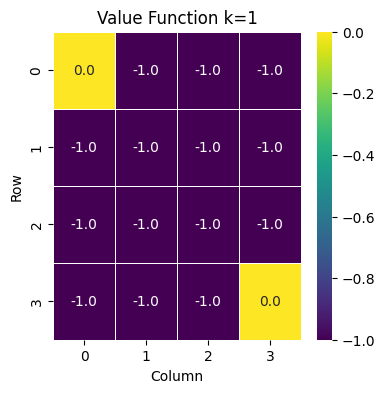

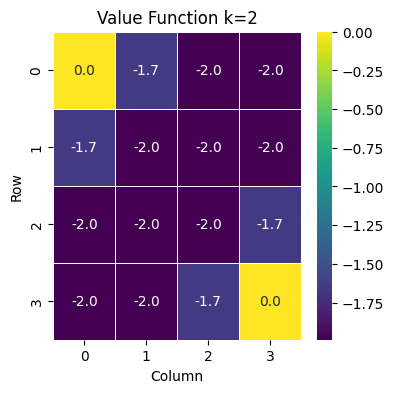

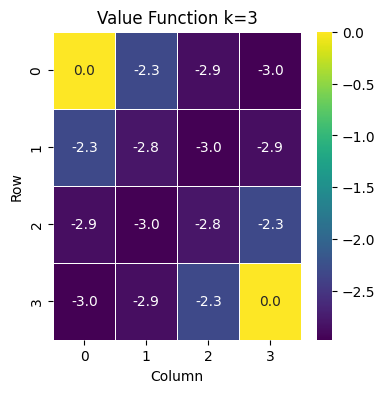

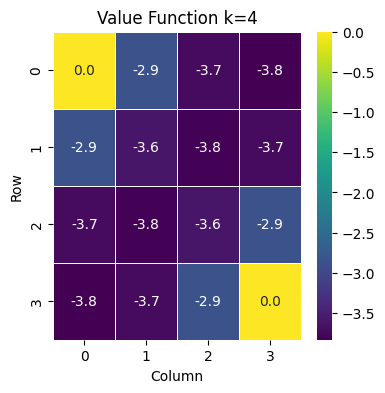

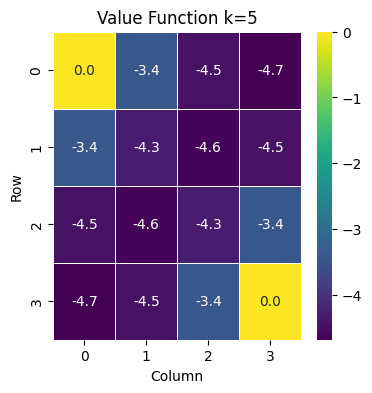

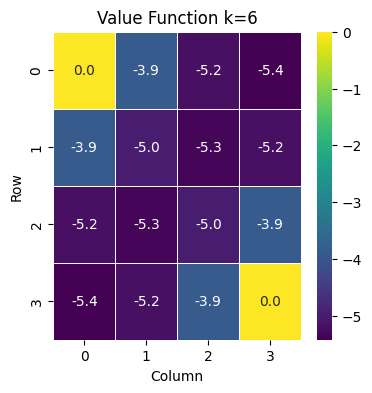

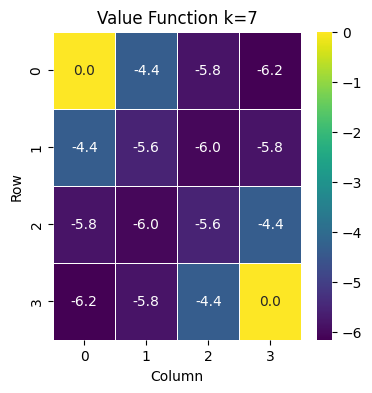

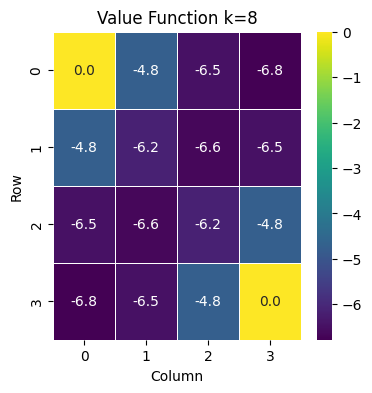

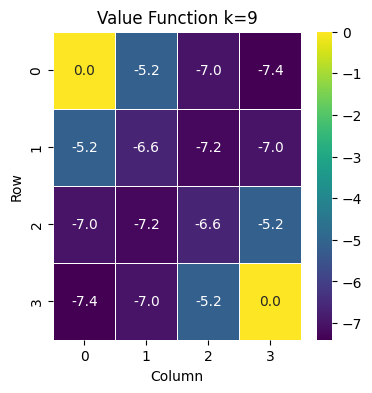

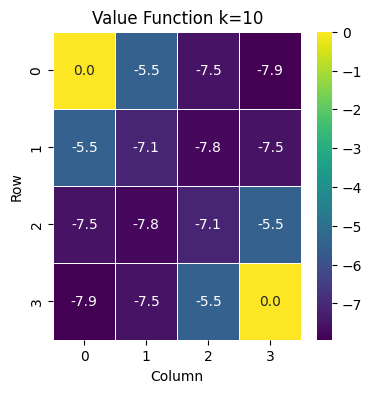

In [154]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

for k in range(3):
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########

  V_old = V.copy()




  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [3]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

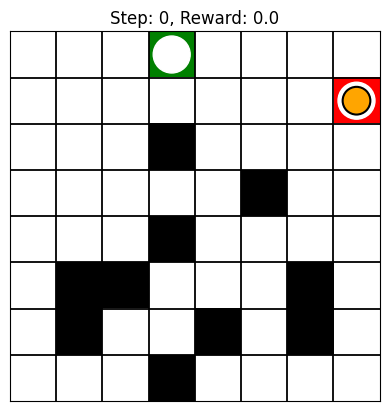

Location (1,6) t=0 reward=0.0
Location (1,7) t=1 reward=0.0
Location (2,7) t=2 reward=0.0
Location (3,7) t=3 reward=0.0
Location (3,6) t=4 reward=0.0
Location (2,6) t=5 reward=0.0
Location (2,5) t=6 reward=0.0
Location (2,5) t=7 reward=-1.0
Location (2,4) t=8 reward=0.0
Location (1,4) t=9 reward=0.0


In [55]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()

In [78]:
V = np.zeros(64)
gamma = 0.9  # learning rate
obstacles = []

for _ in range(10):
  for s in range(64):
    for a in [-8,8,-1,1]:
      s2 = s + a
      if s2 in obstacles:
        R = -1
      elif GOAL_LOC == s2:
        R = 1
      elif -1 > s%8 - s2%8 > 1 or 0<s2>63:  # Outside boundary
        R = -1
        s2 = s
      else:
        R = -1
      # print("s=",s,"a=",a,"s2=",s2,"R=",R, "V=",V[s])
      V[s] += 1/4 * (R + gamma * V[s2])

print(V)

[ -9809.25874436  -9237.39016455  -9070.92662082  -9036.23412037
  -9064.47094865  -9198.38955708  -9630.9929563  -10785.75847213
 -10618.29901402 -10390.30854818 -10256.72460638 -10193.89365991
 -10210.21912844 -10344.6690093  -10690.26190908 -11344.66091911
 -11613.14523777 -11691.59236589 -11696.62508495 -11681.92548022
 -11708.00028507 -11830.80167946 -12101.57531252 -12536.8055404
 -12879.97852859 -13096.27115722 -13206.43979698 -13251.18765421
 -13295.80682126 -13401.04262793 -13606.18974363 -13915.02878006
 -14223.18912936 -14467.37269372 -14624.75772043 -14709.67052835
 -14769.87524879 -14859.23885908 -15018.77473135 -15266.31822435
 -15544.52928397 -15792.17383331 -15973.12416428 -16085.73349474
 -16161.83425576 -16253.93071004 -16438.07806621 -16805.95620731
 -17192.4992222  -17523.0503433  -17766.45761879 -17925.64266134
 -18037.04094671 -18191.86958875 -18645.66595041 -19960.30021589
 -20758.99271375 -21329.53423157 -21717.03543317 -21965.64515729
 -22148.82398834 -22478.60

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming V is a 1D numpy array of length 64
# Example V (replace with your actual V)
# V = np.random.rand(64) * 10 - 5 # Mock data for demonstration

# Reshape the 1D value function array into an 8x8 grid
V_grid = V.reshape((8, 8))

# Plot the value function as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(V_grid, annot=False, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title("Value Function (8x8 Grid)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

ValueError: cannot reshape array of size 16 into shape (8,8)

In [81]:
import gymnasium as gym
import gym_simplegrid
import numpy as np

# Create the SimpleGrid environment
# Using a standard setup, assuming no specific options for an empty grid unless requested
env = gym.make('SimpleGrid-8x8-v0')

# Number of episodes to generate
num_episodes = 1000

# List to store generated episodes
episodes = []

for i in range(num_episodes):
    # Reset the environment for a new episode
    obs, info = env.reset(seed=i) # Use episode number as seed for variety

    episode_states = []
    episode_actions = []
    episode_rewards = []
    terminated = False
    truncated = False

    while not terminated and not truncated:
        # Store the current state
        episode_states.append(obs)

        # Choose a random action (random policy)
        action = env.action_space.sample()
        episode_actions.append(action)

        # Take a step in the environment
        obs, reward, terminated, truncated, info = env.step(action)
        episode_rewards.append(reward)

    # Store the last state (terminal state)
    episode_states.append(obs)

    # Store the complete episode
    episodes.append({
        'states': episode_states,
        'actions': episode_actions,
        'rewards': episode_rewards
    })

    if (i + 1) % 100 == 0:
        print(f"Generated {i + 1}/{num_episodes} episodes")

print("\nEpisode generation finished.")
# The 'episodes' list now contains the generated episodes

# Close the environment
env.close()

Generated 100/1000 episodes
Generated 200/1000 episodes
Generated 300/1000 episodes
Generated 400/1000 episodes
Generated 500/1000 episodes
Generated 600/1000 episodes
Generated 700/1000 episodes
Generated 800/1000 episodes
Generated 900/1000 episodes
Generated 1000/1000 episodes

Episode generation finished.


SystemExit: 

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
